In [1]:
# http://combine-australia.github.io/RNAseq-R/06-rnaseq-day1.html

In [2]:
# source("http://bioconductor.org/biocLite.R")
# biocLite("limma")
# install.packages('reshape2')


In [3]:
library(limma)
library(reshape2)
library(Glimma)
library(reshape)
library(edgeR)
# library(Mus.musculus)


Attaching package: 'reshape'


The following objects are masked from 'package:reshape2':

    colsplit, melt, recast




In [4]:
library(limma)
library(reshape2)
library(Glimma)
library(reshape)
library(edgeR)
# change this
setwd("C:\\Users\\Derrick\\Documents\\DSC180B-PROJECT")


In [5]:
file_url = 'https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE44639&format=file'            
raw_dir = "data/raw/"
temp_dir = "data/temp/"
file_name = 'GSE44639_RAW.tar'

In [6]:
ingest_data <- function(file_url, file_name, raw_dir, temp_dir) {
    if (!dir.exists(raw_dir)) {
        dir.create(raw_dir, recursive = TRUE)
    }
    out = paste(raw_dir, file_name, sep="")
    utils::download.file(file_url, destfile=out, mode="wb")
    utils::untar(out, exdir=temp_dir)
}

ingest_data(file_url, file_name, raw_dir, temp_dir)

In [7]:
read_all_files_in_dir_with_columns <- function(file_dir, required_columns) {
    files <- list.files(path=file_dir)
    
    all <- list()
    
    for (i in files) {
        fp <- paste(file_dir, i, sep='')
        seqdata <- read.delim(gzfile(fp), stringsAsFactors = FALSE)
        columns <- colnames(seqdata)
        
        has_unidentified_col <- FALSE
        
        # ignore samples with columns not present in required_columns
        for (c in columns) {
            if (!any(required_columns==c)) {
                has_unidentified_col <- TRUE
                break
            }
        }
        
        if (has_unidentified_col) {
            next
        }
        
        sampleName = strsplit(fp, "/")[[1]][3]
        sampleName = strsplit(sampleName, ".txt")[[1]][1]
        
        
        cellType = strsplit(fp, "_")[1]
        cellType = cellType[[1]][3]
        cellType = strsplit(cellType, ".txt")
        cellType = cellType[[1]][1]
        
        healthy <- !grepl("P", fp, fixed=TRUE)
        
        # add healthy column
        seqdata$healthy <- healthy
        seqdata$cellType <- cellType
        seqdata$sampleName <- sampleName
        
        if (length(all) == 0) {
            all <- seqdata
        } else {
            all <- rbind(all, seqdata)
        }
    }
    
    return(all)
}

required_columns <- list("miRNA", "Chromosome", "Position", "Strand", "Total.miRNA.reads", "RPM..reads.per.million.")
all <- read_all_files_in_dir_with_columns(temp_dir, required_columns)

In [8]:
all

miRNA,Chromosome,Position,Strand,Total.miRNA.reads,RPM..reads.per.million.,healthy,cellType,sampleName
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<lgl>,<chr>,<chr>
hsa-miR-378c,chr10,132760851,-,7,1,TRUE,Naive,GSM1088200_M7_Naive
hsa-mir-1321,chrX,85090785,+,26,6,TRUE,Naive,GSM1088200_M7_Naive
hsa-miR-378d,chr8,94928250,-,2,1,TRUE,Naive,GSM1088200_M7_Naive
hsa-miR-2110,chr10,115933864,-,5,1,TRUE,Naive,GSM1088200_M7_Naive
hsa-mir-200b,chr1,1102484,+,2,1,TRUE,Naive,GSM1088200_M7_Naive
hsa-miR-125a-5p,chr19,52196507,+,7,1,TRUE,Naive,GSM1088200_M7_Naive
hsa-mir-671,chr7,150935507,+,1,1,TRUE,Naive,GSM1088200_M7_Naive
hsa-miR-193a-5p,chr17,29887015,+,1,1,TRUE,Naive,GSM1088200_M7_Naive
hsa-mir-378,chr5,149112388,+,4,1,TRUE,Naive,GSM1088200_M7_Naive


# TEST USING MANUALLY CALCULATED RPM


In [9]:
countmatrix <- dcast(all, miRNA ~ sampleName, value.var= "Total.miRNA.reads", fill= 0)
rownames(countmatrix) <- countmatrix$miRNA
countmatrix$miRNA <- NULL

testcpm <- cpm(countmatrix)
testcpm

,GSM1088200_M7_Naive,GSM1088201_M8_Naive,GSM1088202_M9_Naive,GSM1088203_M10_Naive,GSM1088204_M12_Naive,GSM1088205_M29_Naive,GSM1088206_M7_rTreg,GSM1088207_M8_rTreg,GSM1088208_M9_rTreg,GSM1088209_M10_rTreg,...,GSM1088270_P5_Tem,GSM1088271_P6_Tem,GSM1088272_P7_Tem,GSM1088273_P1_Ttm,GSM1088274_P2_Ttm,GSM1088275_P3_Ttm,GSM1088276_P4_Ttm,GSM1088277_P5_Ttm,GSM1088278_P6_Ttm,GSM1088279_P7_Ttm
hsa-let-7a,53054.01718,29965.2841,63255.76089,42263.89338,54834.857006,1.083206e+05,37393.162,50640.0075,34184.1386,62679.03525,...,45099.3831,70031.99431,5.523976e+04,14934.60530,72746.366027,57734.011950,47810.529299,51606.869316,52636.87095,50821.965196
hsa-let-7a-1,2086.84485,365.4303,926.87657,1868.01739,1446.222666,1.175543e+03,0.000,6913.9494,455.7885,816.32653,...,822.4812,10004.57062,8.835036e+02,191.30579,569.404614,995.795530,553.567633,425.681323,532.90433,930.633056
hsa-let-7a-2,2167.10811,1096.2909,1155.03080,790.31505,1711.146338,1.225893e+03,0.000,1121.1810,911.5770,957.32839,...,411.2406,990.30014,9.593832e+02,248.69753,636.820461,1272.405399,681.995323,531.324863,573.12352,1018.996195
hsa-let-7a-3,1846.05506,365.4303,898.35729,646.62140,1398.449545,1.159058e+03,0.000,1121.1810,455.7885,794.06308,...,411.2406,736.37703,8.511722e+02,178.55207,559.551529,946.005753,522.567845,413.252671,532.90433,911.832388
hsa-let-7a*,0.00000,0.0000,0.00000,0.00000,17.372044,2.040912e+01,0.000,0.0000,0.0000,0.00000,...,0.0000,0.00000,2.771258e+01,57.39174,17.113253,0.000000,4.428541,89.072004,0.00000,1.880067
hsa-let-7b,18942.13019,34350.4477,18708.64705,4616.15835,19938.763545,2.928417e+04,48076.923,5512.4731,18231.5406,44808.90538,...,6579.8492,14625.97126,2.053898e+04,5146.12574,35909.828712,16347.643284,11248.494296,13503.730149,28646.12136,13594.762886
hsa-let-7b*,0.00000,0.0000,0.00000,0.00000,17.372044,1.233518e+00,0.000,0.0000,0.0000,0.00000,...,0.0000,0.00000,1.715541e+01,12.75372,6.223001,0.000000,0.000000,4.142884,10.05480,5.640200
hsa-let-7c,1605.26527,913.5757,2381.35980,1401.01304,907.689301,1.140444e+03,9615.385,1962.0667,11850.5014,734.69388,...,137.0802,431.66929,4.664952e+02,210.43637,420.571168,647.267094,743.994898,404.966904,1116.08265,520.778498
hsa-let-7d,3451.32033,4933.3090,6374.05886,8316.26971,7517.752058,8.294961e+03,534.188,22703.9148,3646.3081,5974.02597,...,2878.6840,14879.89437,6.649700e+03,2104.36369,6981.170235,7722.947555,5491.390916,6326.183751,7470.71540,8174.530359
hsa-let-7d*,0.00000,0.0000,71.29820,17.96171,78.174198,8.746765e+00,0.000,0.0000,455.7885,14.84230,...,0.0000,25.39231,7.917881e+01,146.66777,6.741585,27.660987,17.714164,40.393118,60.32879,54.521937


In [10]:
countmatrix

,GSM1088200_M7_Naive,GSM1088201_M8_Naive,GSM1088202_M9_Naive,GSM1088203_M10_Naive,GSM1088204_M12_Naive,GSM1088205_M29_Naive,GSM1088206_M7_rTreg,GSM1088207_M8_rTreg,GSM1088208_M9_rTreg,GSM1088209_M10_rTreg,...,GSM1088270_P5_Tem,GSM1088271_P6_Tem,GSM1088272_P7_Tem,GSM1088273_P1_Ttm,GSM1088274_P2_Ttm,GSM1088275_P3_Ttm,GSM1088276_P4_Ttm,GSM1088277_P5_Ttm,GSM1088278_P6_Ttm,GSM1088279_P7_Ttm
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-let-7a,661,164,4436,2353,12626,965958,70,542,75,8446,...,329,2758,83719,2342,140279,10436,10796,49827,5235,27032
hsa-let-7a-1,26,2,65,104,333,10483,0,74,1,110,...,6,394,1339,30,1098,180,125,411,53,495
hsa-let-7a-2,27,6,81,44,394,10932,0,12,2,129,...,3,39,1454,39,1228,230,154,513,57,542
hsa-let-7a-3,23,2,63,36,322,10336,0,12,1,107,...,3,29,1290,28,1079,171,118,399,53,485
hsa-let-7a*,0,0,0,0,4,182,0,0,0,0,...,0,0,42,9,33,0,1,86,0,1
hsa-let-7b,236,188,1312,257,4591,261144,90,59,40,6038,...,48,576,31128,807,69246,2955,2540,13038,2849,7231
hsa-let-7b*,0,0,0,0,4,11,0,0,0,0,...,0,0,26,2,12,0,0,4,1,3
hsa-let-7c,20,5,167,78,209,10170,18,21,26,99,...,1,17,707,33,811,117,168,391,111,277
hsa-let-7d,43,27,447,463,1731,73971,1,243,8,805,...,21,586,10078,330,13462,1396,1240,6108,743,4348


In [11]:
# Which values in myCPM are greater than 0.5?
thresh <- testcpm > 100
# This produces a logical matrix with TRUEs and FALSEs
head(thresh)

,GSM1088200_M7_Naive,GSM1088201_M8_Naive,GSM1088202_M9_Naive,GSM1088203_M10_Naive,GSM1088204_M12_Naive,GSM1088205_M29_Naive,GSM1088206_M7_rTreg,GSM1088207_M8_rTreg,GSM1088208_M9_rTreg,GSM1088209_M10_rTreg,...,GSM1088270_P5_Tem,GSM1088271_P6_Tem,GSM1088272_P7_Tem,GSM1088273_P1_Ttm,GSM1088274_P2_Ttm,GSM1088275_P3_Ttm,GSM1088276_P4_Ttm,GSM1088277_P5_Ttm,GSM1088278_P6_Ttm,GSM1088279_P7_Ttm
hsa-let-7a,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
hsa-let-7a-1,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
hsa-let-7a-2,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
hsa-let-7a-3,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
hsa-let-7a*,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
hsa-let-7b,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [12]:
table(rowSums(thresh))


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
1174  134   49   31   16   13   12    7    5    9    4    8    4    8    1    2 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   31   32 
   4    6    1    6    7    3    2    2    2    8    2    1    2    1    1    4 
  33   34   35   36   37   38   39   40   41   42   43   46   47   49   50   51 
   1    3    1    2    1    2    2    3    4    2    1    1    3    3    2    2 
  52   53   54   55   56   57   58   59   60   61   62   63   64   65   66   67 
   4    2    2    4    4    3    2    1    2    1    3    2    2    4    2    5 
  68   69   70   71   72   73   74   75   76   77   78   79 
   6    1    1    4    5    2    2    2    1    7   15   42 

In [13]:
# we would like to keep genes that have at least 5 TRUES in each row of thresh
keep <- rowSums(thresh) >= 9
# Subset the rows of countdata to keep the more highly expressed genes
counts.keep <- countdata[keep,]
summary(keep)

ERROR: Error in eval(expr, envir, enclos): object 'countdata' not found


In [ ]:
dim(counts.keep)


In [ ]:
y <- DGEList(counts.keep)
# Apply normalisation to DGEList object
y <- calcNormFactors(y)
y

In [ ]:
sampleinfo <- all[row.names(unique(all[,c("sampleName", "cellType", "healthy")])),][,c("sampleName", "healthy", "cellType")]
row.names(sampleinfo) <- NULL

data.frame(sampleinfo$CellType)
head(sampleinfo)

In [ ]:
labels <- paste(sampleinfo$sampleName, sampleinfo$cellType, sampleinfo$healthy)
group <- paste(sampleinfo$cellType,sampleinfo$healthy,sep=".")
group <- factor(group)
glMDSPlot(y, labels=labels, groups=group, folder="mds")

In [ ]:
# our groups
group

In [ ]:
# Specify a design matrix without an intercept term
design <- model.matrix(~ 0 + group)

In [ ]:
colnames(design) <- levels(group)

In [ ]:
par(mfrow=c(1,1))
v <- voom(y,design,plot = TRUE)

In [ ]:
y

In [ ]:
fit <- lmFit(v)
names(fit)

In [ ]:
# we want to compare healthy naive cells to pre-t1 naive cells
cont.matrix <- makeContrasts(B.healthVsdiab=Naive.TRUE - Naive.FALSE,levels=design)
cont.matrix

In [ ]:
fit.cont <- contrasts.fit(fit, cont.matrix)
fit.cont <- eBayes(fit.cont)
dim(fit.cont)


In [ ]:
summa.fit <- decideTests(fit.cont)
summary(summa.fit)

# END TEST

In [ ]:
#subset the pre-t1 group from all
pret1 <- all[all$healthy == FALSE,] 


In [ ]:
countdata <- dcast(pret1, miRNA ~ sampleName, value.var= "Total.miRNA.reads", fill= 0)

rownames(countdata) <- countdata$miRNA
countdata$miRNA <- NULL
countdata

In [ ]:
group<-factor(c(rep("Naive",7),rep("rTreg",7),rep("aTreg",6),rep("Ttm",7),rep("Tcm",7),rep("Tem",7)))

# create model
design2<-model.matrix(~0+group)
design1<-model.matrix(~group)
design<-cbind(design1[,1],design1[,3],design2[,1],design1[,4:6])
colnames(design)<-c("(Intercept)","grouprTreg","groupaTreg","groupTcm","groupTem","groupTtm")


In [ ]:
d <- DGEList(counts=countdata,group=group)
nf<-calcNormFactors(d$counts)
design<-model.matrix(~group)
d

In [ ]:
nf<-calcNormFactors(d$counts)
y<-voom(d$counts,plot=TRUE,design,lib.size=colSums(d$counts)*nf)
fit <- lmFit(y,design)
fit <- eBayes(fit)
summary(decideTests(fit))
degene<-topTable(fit,coef=2,n=5)

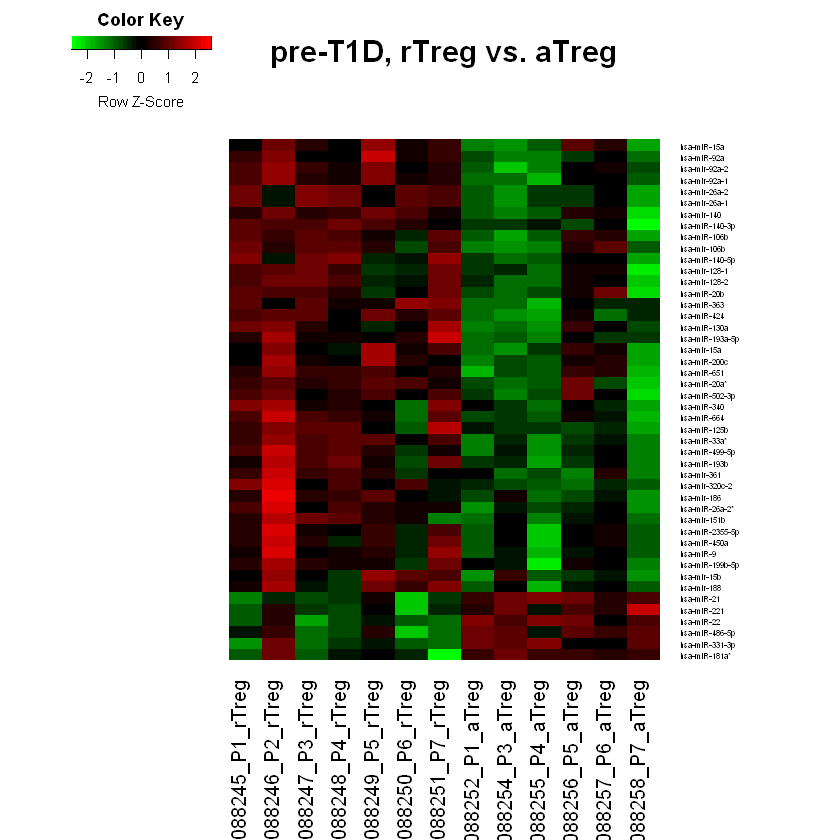

In [35]:
library(limma)
library(reshape2)
library(Glimma)
library(reshape)
library(edgeR)
# change this
setwd("C:\\Users\\Derrick\\Documents\\DSC180B-PROJECT")

file_url = 'https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE44639&format=file'            
raw_dir = "data/raw/"
temp_dir = "data/temp/"
file_name = 'GSE44639_RAW.tar'

read_all_files_in_dir_with_columns <- function(file_dir, required_columns) {
    files <- list.files(path=file_dir)
    
    all <- list()
    
    for (i in files) {
        fp <- paste(file_dir, i, sep='')
        seqdata <- read.delim(gzfile(fp), stringsAsFactors = FALSE)
        columns <- colnames(seqdata)
        
        has_unidentified_col <- FALSE
        
        # ignore samples with columns not present in required_columns
        for (c in columns) {
            if (!any(required_columns==c)) {
                has_unidentified_col <- TRUE
                break
            }
        }
        
        if (has_unidentified_col) {
            next
        }
        
        sampleName = strsplit(fp, "/")[[1]][3]
        sampleName = strsplit(sampleName, ".txt")[[1]][1]
        
        
        cellType = strsplit(fp, "_")[1]
        cellType = cellType[[1]][3]
        cellType = strsplit(cellType, ".txt")
        cellType = cellType[[1]][1]
        
        healthy <- !grepl("P", fp, fixed=TRUE)
        
        # add healthy column
        seqdata$healthy <- healthy
        seqdata$cellType <- cellType
        seqdata$sampleName <- sampleName
        
        if (length(all) == 0) {
            all <- seqdata
        } else {
            all <- rbind(all, seqdata)
        }
    }
    
    return(all)
}

required_columns <- list("miRNA", "Chromosome", "Position", "Strand", "Total.miRNA.reads", "RPM..reads.per.million.")
all <- read_all_files_in_dir_with_columns(temp_dir, required_columns)

library(limma)
library(edgeR)
library(gplots)

#subset the pre-t1 group from all
pret1 <- all[all$healthy == FALSE,] 

countdata <- dcast(pret1, miRNA ~ sampleName, value.var= "Total.miRNA.reads", fill= 0)

rownames(countdata) <- countdata$miRNA
countdata$miRNA <- NULL
# countdata

group<-factor(c(rep("Naive",7),rep("rTreg",7),rep("aTreg",6),rep("Ttm",7),rep("Tcm",7),rep("Tem",7)))

# create model
design2<-model.matrix(~0+group)
design1<-model.matrix(~group)
design<-cbind(design1[,1],design1[,3],design2[,1],design1[,4:6])
colnames(design)<-c("(Intercept)","grouprTreg","groupaTreg","groupTcm","groupTem","groupTtm")

d <- DGEList(counts=countdata,group=group)
nf<-calcNormFactors(d$counts)
design<-model.matrix(~group)

# F test for rTreg to aTreg

c1 <- countdata[8:20] + 0.5
group <- factor(c(rep("rTreg", 7), rep("aTreg", 6)))
# group

d <- DGEList(counts=c1, group=group)
# d$samples

dd <- d[rowSums(d$counts) >= 1.5*ncol(d), ]
d<-1e+06 * dd$count/expandAsMatrix(d$samples$lib.size,dim(dd))

d<-log2(d)

F<-data.frame(nrow(d))
x<-data.frame(nrow(d),2)
for (i in 1:nrow(d)) {
        a<-7*abs(mean(d[i,1:7])-mean(d[i,1:13]))+6*abs(mean(d[i,8:13])-mean(d[i,1:13]))
        bb = 0
        for (j in 1:7) {
        b<-abs(d[i,j]-mean(d[i,1:7]))
        bb = bb +b
        }

        for (j in 8:13) {
        b<-abs(d[i,j]-mean(d[i,8:13]))
        bb = bb +b
        }
        F[i] <- 12*a/bb

        x[i,2]<-mean(d[i,1:7])
        x[i,1]<-mean(d[i,8:13])

}

names(F)<-rownames(d)
rownames(x)<-rownames(d)
# length(F[,F>9.6])

## 93 for rTreg 2 aTreg
# 109

mydist<-function(c) {
require(amap)
Dist(c,method="pearson")
 }
myclust<-function(c) { hclust(c,method='ward.D') }

# design<-model.matrix(~group)
# nf<-calcNormFactors(d)
# y<-voom(d,plot=TRUE,design,lib.size=colSums(d)*nf)

# heatmap.2(d,distfun=mydist,hclustfun=myclust,trace="none",cexRow=1.0,cexCol=1.2,las=2,col=greenred(30),lhei=c(1,7),scale="row",sepcolor="yellow", sepwidth = 0.1,margin=c(9,9))

# fold change
f<-x[names(-sort(-F))[1:93],1]-x[names(-sort(-F))[1:93],2]
names(f)<-names(-sort(-F))[1:93]
id<-c(names(f[f>=2]),names(f[-f>=2]))
y<-d[id,]
# heatmap.2(y,distfun=mydist,hclustfun=myclust,trace="none",cexRow=1.0,cexCol=1.2,las=2,col=greenred(30),lhei=c(1,7),scale="row",sepcolor="yellow", sepwidth = 0.1)
heatmap.2(x=y,distfun=mydist,dendrogram ="none", main='pre-T1D, rTreg vs. aTreg',hclustfun=myclust,trace="none",density.info="none",cexRow=0.5,cexCol=1.2,las=2,col=greenred(30),lhei=c(1,5),sepcolor="yellow",margin=c(9,9), sepwidth = 0.0,scale="row",Colv = FALSE)
write.csv(y,file="data/temp/Pre-T1D-aTreg2rTreg-intensity.csv")

In [28]:
f

hsa-miR-33a*      hsa-miR-22      hsa-miR-21     hsa-miR-424  hsa-miR-140-3p 
     -3.5967092       4.4149301       2.0544415      -2.7753623      -2.1260807 
   hsa-miR-20a*   hsa-mir-26a-1  hsa-mir-320d-1  hsa-mir-320d-2  hsa-mir-320c-2 
     -2.8387611      -2.5542807      -1.8651545      -1.8651545      -2.0088906 
  hsa-mir-26a-2   hsa-mir-92a-1     hsa-miR-92a     hsa-miR-363    hsa-miR-181b 
     -2.5353912      -2.2865929      -2.1703003      -2.9500543       0.5330937 
  hsa-mir-92a-2 hsa-miR-193a-5p  hsa-miR-26a-2*     hsa-mir-140     hsa-mir-484 
     -2.0839916      -2.2852321      -2.2534679      -2.8031796       1.8998586 
   hsa-miR-1301     hsa-let-7i*    hsa-miR-125b     hsa-mir-342  hsa-miR-499-5p 
      0.9733761       1.7723775      -2.7608470      -1.3511403      -2.6580213 
    hsa-miR-651   hsa-miR-181a*    hsa-miR-193b     hsa-mir-186     hsa-miR-155 
     -2.4775826       2.8159069      -2.6741407      -2.5374428       1.2898726 
    hsa-miR-221    hsa-mir-374b    hsa-mir-374c      hsa-mir-32   hsa-mir-29b-2 
      2.0923958      -1.7080091      -1.7080091      -1.6646545      -1.4936883 
    hsa-mir-29c  hsa-miR-331-3p     hsa-miR-664    hsa-miR-181a  hsa-miR-362-5p 
     -1.1494551       4.3039747      -2.0206760       0.6251840      -1.6960000 
 hsa-mir-320c-1    hsa-miR-181c   hsa-mir-29b-1      hsa-miR-32  hsa-miR-486-5p 
     -1.8135397       1.4792501      -1.4638800      -1.3407545       2.3123452 
 hsa-miR-590-3p      hsa-miR-95     hsa-mir-361     hsa-miR-17*   hsa-mir-128-2 
     -1.5808423      -1.2936480      -2.2221324      -1.6520176      -2.4659113 
     hsa-let-7i     hsa-mir-502  hsa-miR-342-3p    hsa-miR-106b     hsa-miR-141 
      1.0544992      -1.9967686      -1.2248692      -4.0963884      -1.9079726 
   hsa-miR-181d     hsa-miR-21*  hsa-miR-502-3p       hsa-miR-9     hsa-mir-7-3 
      1.5082808       1.7684463      -2.0654045      -3.1188932       1.6254120 
 hsa-miR-140-5p     hsa-mir-29a    hsa-mir-3529     hsa-mir-7-2     hsa-mir-15b 
     -2.4727605       1.0235989       1.5582429       1.5582429      -2.5391915 
hsa-miR-2355-5p     hsa-miR-15a    hsa-mir-151b    hsa-miR-130a  hsa-miR-423-3p 
     -2.3048926      -2.3643915      -2.3119463      -2.0931809       1.3186898 
    hsa-mir-188    hsa-mir-378i    hsa-miR-200c     hsa-mir-7-1  hsa-mir-320b-1 
     -2.8134357      -1.7077610      -2.9855635       1.5831987      -1.1438438 
    hsa-miR-340    hsa-miR-450a      hsa-miR-98    hsa-mir-106b  hsa-mir-199a-2 
     -2.0356463      -2.3041534       0.9380292      -3.2615570      -1.9352704 
   hsa-mir-199b   hsa-mir-128-1 hsa-miR-199b-5p hsa-miR-499a-3p    hsa-let-7f-2 
     -1.9352704      -2.0906774      -2.2815886      -1.8874018      -1.3080767 
 hsa-mir-199a-1      hsa-mir-17   hsa-miR-500a*     hsa-mir-15a     hsa-miR-26a 
     -1.9231434      -1.8487152      -1.8384632      -3.2008018      -0.7191326 
hsa-miR-125a-5p     hsa-miR-20b     hsa-miR-629 
      1.5245750      -2.2308905       1.1265305

In [ ]:
length(id)

In [ ]:
countdata[21:27]

In [ ]:
de<-rownames(x)%in%id

# plotMA(2*x,status=de,col=c("black", "red"),cex=0.8,legend=FALSE,main="Pre-T1D aTreg vs healthy aTreg")
# legend("bottomright",legend=c("F<10","F>=10"),col=c("black","red"),pch=c(20,20))

f<-c(x[de,1]-x[de,2])
names(f)<-names(-sort(-F))[1:7]

fval<-as.numeric(F)
fold<-as.numeric(x[,1]-x[,2])
# plot(fval,fold,main="F statistics vs fold change",xlab="F value",ylab="Fold change",pch=20,col="blue")
# abline(h=c(2,-2),v=10,col="red")

# F test for aTrege 2 Naive
#c2<-cbind(data[1:7],data[15:21])+0.5
# F test for Ttm 2 Naive
# F test for Tcm 2 Naive
# F test for Tem 2 Naive
#c2<-cbind(data[1:7],data[22:28])+0.5
#c2<-cbind(data[1:7],data[29:35])+0.5
c2<-cbind(countdata[1:7],countdata[21:27])+0.5
#group<-factor(c(rep("Naive",7),rep("aTreg",7)))
group<-factor(c(rep("Naive",7),rep("Tcm",7)))
d <- DGEList(counts=c2,group=group)
# d$samples
dd <- d[rowSums(d$counts) >= 1.5*14, ]
d<-1e+06 * dd$count/expandAsMatrix(d$samples$lib.size,dim(dd))

d<-log2(d)

F<-data.frame(nrow(d))
x<-data.frame(nrow(d),2)
for (i in 1:nrow(d)) {
a<-7*abs(mean(d[i,1:7])-mean(d[i,1:14]))+7*abs(mean(d[i,8:14])-mean(d[i,1:14]))
bb = 0
        for (j in 1:7) {
        b<-abs(d[i,j]-mean(d[i,1:7]))
        bb = bb +b
        }

        for (j in 8:14) {
        b<-abs(d[i,j]-mean(d[i,8:14]))
        bb = bb +b
        }

F[i]<-12*a/bb

x[i,2]<-mean(d[i,1:7])
x[i,1]<-mean(d[i,8:14])

}

names(F)<-rownames(d)
rownames(x)<-rownames(d)
# length(F[,F>9.6])
## 93 for rTreg 2 aTreg
# 109 rTreg 2 Naive
# 117 aTreg 2 Naive
# 72 Ttm 2 Naive 
# 125 Tcm 2 Naive
# 197 for Tem 2 Naive
# fold change
# comm to Naive id<-c(id_aTreg,"hsa-miR-126*","hsa-mir-619","hsa-miR-30d*","hsa-mir-3929","hsa-mir-1273d")
f<-x[names(-sort(-F))[1:117],1]-x[names(-sort(-F))[1:117],2]
names(f)<-names(-sort(-F))[1:117]
id<-c(names(f[f>=2]),names(f[-f>=2]))
# length(id)

# id<-c(id_PrTreg,id_PaTreg,id_PTtm,id_PTcm,id_PTem)
# > length(id)
# [1] 370
u_id<-unique(id)
# [1] 209
length(rownames(d)[rownames(d)%in%u_id])
#179 left
c<-countdata[,1:ncol(countdata)]+0.5

group<-factor(c(rep("Naive",7),rep("rTreg",7),rep("aTreg",6),rep("Tcm",7),rep("Tem",7),rep("Ttm",7)))
d <- DGEList(counts=c,group=group)
# d$samples
dd <- d[rowSums(d$counts) >= 1.5*ncol(countdata), ]
d<-1e+06 * dd$count/expandAsMatrix(d$samples$lib.size,dim(dd))
d<-log2(d)

# X

# rownames(d)[rownames(d)%in%u_id]
X<-d[rownames(d)[rownames(d)%in%u_id],]
x.mean<-data.frame(179,6)
for ( i in 1:63 ){
 x.mean[i,1]<-mean(X[i,1:6])
 x.mean[i,2]<-mean(X[i,7:14])
 x.mean[i,3]<-mean(X[i,15:23])
 x.mean[i,4]<-mean(X[i,24:28])
 x.mean[i,5]<-mean(X[i,29:33])
 x.mean[i,6]<-mean(X[i,34:38])
 }

colnames(x.mean)<-c("Naive","rTreg","aTreg","Tcm","Tem","Ttm")
xx<- apply(x.mean,2,as.numeric)
rownames(xx)<-rownames(x.mean)
heatmap.2(xx,distfun=mydist,hclustfun=myclust,trace="none",cexRow=1.0,cexCol=1.0,las=2,col=greenred(30),lhei=c(1,6),scale="row",sepcolor="yellow", sepwidth = 0.1,margin=c(7,7))


# colnames(countdata)

In [ ]:
countdata

In [ ]:
install.packages("amap")

In [ ]:
all[8:19]

In [ ]:
# When in doubt, a threshold of 1 CPM in at least the minimum group's sample size is a good rule of thumb.

In [ ]:
# print(required_columns)
# countdata <- cast(all, miRNA ~ sampleName, value= 'Total.miRNA.reads', fill= 0)
# countdata

In [ ]:
# myCPM <- cpm(countdata)
myCPM <- countdata
head(myCPM)

In [ ]:
# Which values in myCPM are greater than 0.5?
thresh <- myCPM > 1
# This produces a logical matrix with TRUEs and FALSEs
head(thresh)

In [ ]:
table(rowSums(thresh))

In [ ]:
# we would like to keep genes that have at least 5 TRUES in each row of thresh
keep <- rowSums(thresh) >= 7
# Subset the rows of countdata to keep the more highly expressed genes
counts.keep <- countdata[keep,]
summary(keep)

In [ ]:
dim(counts.keep)


In [ ]:
# rownames(counts.keep) <- counts.keep$miRNA
# counts.keep$miRNA <- NULL
# counts.keep

# Get log2 counts per million
logcounts <- cpm(countdata, log=TRUE)
# Check distributions of samples using boxplots
boxplot(logcounts, xlab="", ylab="Log2 reads per million")
# Let's add a blue horizontal line that corresponds to the median logCPM
# abline(h=median(logcounts),col="blue")
title("Boxplots of logCPMs (unnormalised)")


In [ ]:

y2 <- DGEList(countdata)
# Apply normalisation to DGEList object
y2 <- calcNormFactors(y2)
y2

In [ ]:
y <- DGEList(counts.keep)
# Apply normalisation to DGEList object
y <- calcNormFactors(y)
y

In [ ]:
hist(log2(all$RPM..reads.per.million), main='Histogram of log2 of miRNA reads per million')

In [ ]:
hist(log2(all$"Total.miRNA.reads"), main='Histogram of log2 of Total miRNA reads')


In [ ]:
counts.keep

In [ ]:
sampleinfo <- all[row.names(unique(all[,c("sampleName", "cellType", "healthy")])),][,c("sampleName", "healthy", "cellType")]
row.names(sampleinfo) <- NULL

data.frame(sampleinfo$CellType)
head(sampleinfo)

In [ ]:
labels <- paste(sampleinfo$sampleName, sampleinfo$cellType, sampleinfo$healthy)
group <- paste(sampleinfo$healthy,sep=".")
group <- factor(group)
glMDSPlot(y, labels=labels, groups=group, folder="mds")

In [ ]:
# our groups
group

In [ ]:
# Specify a design matrix without an intercept term
design <- model.matrix(~ 0 + group)

In [ ]:
colnames(design) <- levels(group)

In [31]:
par(mfrow=c(1,1))
v <- voom(y,design,plot = TRUE)

Warning message in t(log2(t(counts + 0.5)/(lib.size + 1) * 1e+06)):
"NaNs produced"


ERROR: Error in lmFit(y, design, block = block, correlation = correlation, weights = weights): row dimension of design doesn't match column dimension of data object


In [ ]:
par(mfrow=c(1,2))
boxplot(logcounts, xlab="", ylab="Log2 counts per million",las=2,main="Unnormalised logCPM")
## Let's add a blue horizontal line that corresponds to the median logCPM
abline(h=median(logcounts),col="blue")
boxplot(v$E, xlab="", ylab="Log2 counts per million",las=2,main="Voom transformed logCPM")
## Let's add a blue horizontal line that corresponds to the median logCPM
abline(h=median(v$E),col="blue")

In [ ]:
names(v)

In [ ]:
fit <- lmFit(v)
names(fit)

In [30]:
# we want to compare healthy naive cells to pre-t1 naive cells
cont.matrix <- makeContrasts(B.healthVsdiab=Naive.TRUE - Naive.FALSE,levels=design)
cont.matrix

Warning message in makeContrasts(B.healthVsdiab = Naive.TRUE - Naive.FALSE, levels = design):
"Renaming (Intercept) to Intercept"


ERROR: Error in eval(ej, envir = levelsenv): object 'Naive.TRUE' not found


In [29]:
fit.cont <- contrasts.fit(fit, cont.matrix)
fit.cont <- eBayes(fit.cont)
dim(fit.cont)


ERROR: Error in contrasts.fit(fit, cont.matrix): object 'cont.matrix' not found


In [ ]:
summa.fit <- decideTests(fit.cont)
summary(summa.fit)

In [ ]:
topTable(fit.cont,coef="B.healthVsdiab",sort.by="logFC", number=30)


In [ ]:
par(mfrow=c(1,2))
plotMD(fit.cont,coef=1,status=summa.fit[,"B.healthVsdiab"], values = c(-1, 1))

# For the volcano plot we have to specify how many of the top genes to highlight.
# We can also specify that we want to plot the gene symbol for the highlighted genes.
# let's highlight the top 100 most DE genes
volcanoplot(fit.cont,coef=1,highlight=100,names=fit.cont$genes$SYMBOL)

In [ ]:
fit.cont